In [2]:
# ! wget http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt

# imports

In [121]:
import pandas as pd
import os
import itertools
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, chisquare, ttest_rel
from sklearn import metrics

plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'

SYMBOL_SEPARATOR = '---'

In [4]:
human_mouse_homologs = pd.read_csv('HOM_MouseHumanSequence.rpt', sep='\t')
print(human_mouse_homologs.shape)
human_mouse_homologs.head()

(43117, 13)


,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,39806032,"mouse, laboratory",10090,Gdnf,14573,MGI:107430,NaN,NaN,Chr15 3.8 cM,Chr15:7840327-7867056(+),"NM_010275,NM_001301333,NM_001301357,NM_001301332","NP_001288262,NP_034405,NP_001288286,NP_001288261",P48540
1,39806032,human,9606,GDNF,2668,NaN,HGNC:4232,OMIM:600837,Chr5 p13.2,Chr5:37812677-37840044(-),"NM_199231,NM_001278098,NM_001190469,NM_000514,...","NP_001177398,NP_000505,NP_001177397,XP_0168648...",P39905
2,39806033,"mouse, laboratory",10090,Npy4r,19065,MGI:105374,NaN,NaN,Chr14 20.8 cM,Chr14:33867603-33874376(-),NM_008919,NP_032945,Q61041
3,39806033,human,9606,NPY4R,5540,NaN,HGNC:9329,OMIM:601790,Chr10 q11.22,Chr10:46458551-46470668(-),"NM_001278794,NM_005972","NP_005963,XP_011538238,XP_011538239,XP_0168718...",NaN
4,39806034,"mouse, laboratory",10090,Evx2,14029,MGI:95462,NaN,NaN,Chr2 44.13 cM,Chr2:74483335-74489901(-),"XM_006498728,XM_006498729,NM_007967","XP_006498792,NP_031993,XP_006498791",P49749


In [5]:
gather_results_dir = '/Users/olgabot/botryllus/pipeline-results/kmermaid/april2021-singleton-fewer-species/gather_results__may2021/'

In [6]:
mouse_gather_results = pd.read_parquet(
    os.path.join(
        gather_results_dir,
        "Mus_musculus.GRCm39.pep.all.chr17.fa__gather__human-chr6__moltype-hp__ksize-72.parquet",
    )
)
print(mouse_gather_results.shape)
mouse_gather_results.head()

(6010, 15)


,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72


In [7]:
mouse_gather_results['name'].head().values

array(['ENSP00000341097.4pep chromosome:GRCh38:6:51720849:52087610:-1 gene:ENSG00000170927.15 transcript:ENST00000340994.4 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:PKHD1 description:PKHD1 ciliary IPT domain containing fibrocystin/polyductin [Source:HGNC Symbol;Acc:HGNC:9016]',
       "ENSP00000358487.4pep chromosome:GRCh38:6:88612719:88963409:-1 gene:ENSG00000111880.16 transcript:ENST00000369475.7 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:RNGTT description:RNA guanylyltransferase and 5'-phosphatase [Source:HGNC Symbol;Acc:HGNC:10073]",
       'ENSP00000364121.5pep chromosome:GRCh38:6:32439878:32445046:1 gene:ENSG00000204287.14 transcript:ENST00000374982.5 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:HLA-DRA description:major histocompatibility complex, class II, DR alpha [Source:HGNC Symbol;Acc:HGNC:4947]',
       'ENSP00000364121.5pep chromosome:GRCh38:6:32439878:32445046:1 gene:ENSG000002042

In [8]:
mouse_gather_results['mouse_gene_symbol'] = mouse_gather_results.query_name.str.extract('gene_symbol:([\w\d\-]+)')
mouse_gather_results['human_gene_symbol'] = mouse_gather_results.name.str.extract('gene_symbol:([\w\d\-]+)')
mouse_gather_results['human_ensembl_id'] = mouse_gather_results.name.str.extract('gene:(ENSG\d+)')
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,ENSG00000170927
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,ENSG00000111880
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,ENSG00000206503


In [9]:
human_mouse_homologs["DB Class Key"].nunique()

20598

In [10]:
human_mouse_homologs["DB Class Key"].nunique()

20598

In [11]:
human_mouse_homologs.head()

,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,39806032,"mouse, laboratory",10090,Gdnf,14573,MGI:107430,NaN,NaN,Chr15 3.8 cM,Chr15:7840327-7867056(+),"NM_010275,NM_001301333,NM_001301357,NM_001301332","NP_001288262,NP_034405,NP_001288286,NP_001288261",P48540
1,39806032,human,9606,GDNF,2668,NaN,HGNC:4232,OMIM:600837,Chr5 p13.2,Chr5:37812677-37840044(-),"NM_199231,NM_001278098,NM_001190469,NM_000514,...","NP_001177398,NP_000505,NP_001177397,XP_0168648...",P39905
2,39806033,"mouse, laboratory",10090,Npy4r,19065,MGI:105374,NaN,NaN,Chr14 20.8 cM,Chr14:33867603-33874376(-),NM_008919,NP_032945,Q61041
3,39806033,human,9606,NPY4R,5540,NaN,HGNC:9329,OMIM:601790,Chr10 q11.22,Chr10:46458551-46470668(-),"NM_001278794,NM_005972","NP_005963,XP_011538238,XP_011538239,XP_0168718...",NaN
4,39806034,"mouse, laboratory",10090,Evx2,14029,MGI:95462,NaN,NaN,Chr2 44.13 cM,Chr2:74483335-74489901(-),"XM_006498728,XM_006498729,NM_007967","XP_006498792,NP_031993,XP_006498791",P49749


## Read human gene families

In [13]:
gene_families = pd.read_csv(
    "/Users/olgabot/botryllus-data/hgnc/2022-10-31__human_gene_families_with_ensembl.tsv",
    sep="\t",
    index_col="Approved symbol",
)
gene_families

,HGNC ID,Approved name,Status,Previous symbols,Alias symbols,Chromosome,Accession numbers,RefSeq IDs,Gene group ID,Gene group name,Mouse genome database ID(supplied by MGI),Ensembl gene ID,Alias names,Date symbol changed,Date name changed
Approved symbol,,,,,,,,,,,,,,,
A1BG,HGNC:5,alpha-1-B glycoprotein,Approved,NaN,NaN,19q13.43,NaN,NM_130786,594,Immunoglobulin like domain containing,MGI:2152878,ENSG00000121410,NaN,NaN,NaN
A1BG-AS1,HGNC:37133,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,1987,Antisense RNAs,NaN,ENSG00000268895,NaN,2010-11-25,2012-08-15
A1CF,HGNC:24086,APOBEC1 complementation factor,Approved,NaN,"ACF, ASP, ACF64, ACF65, APOBEC1CF",10q11.23,AF271790,NM_014576,725,RNA binding motif containing,MGI:1917115,ENSG00000148584,NaN,NaN,NaN
A1S9T,HGNC:6,"symbol withdrawn, see [HGNC:12469](/data/gene-...",Symbol Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,HGNC:7,alpha-2-macroglobulin,Approved,NaN,"FWP007, S863-7, CPAMD5",12p13.31,"BX647329, X68728, M11313",NM_000014,2148,Alpha-2-macroglobulin family,MGI:2449119,ENSG00000175899,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,HGNC:25820,"zyg-11 family member B, cell cycle regulator",Approved,ZYG11,FLJ13456,1p32.3,AB051517,NM_024646,6|1492,ZYG11 cell cycle regulator family|Armadillo li...,MGI:2685277,ENSG00000162378,NaN,2005-07-11,2012-12-10
ZYX,HGNC:13200,zyxin,Approved,NaN,NaN,7q34,X95735,NM_003461,1691|1402,MicroRNA protein coding host genes|Zyxin family,MGI:103072,ENSG00000159840,NaN,NaN,NaN
ZYXP1,HGNC:51695,zyxin pseudogene 1,Approved,NaN,NaN,8q24.23,NaN,NaN,NaN,NaN,NaN,ENSG00000274572,NaN,NaN,NaN


In [14]:
gene_families.loc[gene_families['Gene group name'].str.contains('Doublecortin').fillna(False)]

,HGNC ID,Approved name,Status,Previous symbols,Alias symbols,Chromosome,Accession numbers,RefSeq IDs,Gene group ID,Gene group name,Mouse genome database ID(supplied by MGI),Ensembl gene ID,Alias names,Date symbol changed,Date name changed
Approved symbol,,,,,,,,,,,,,,,
DCDC1,HGNC:20625,doublecortin domain containing 1,Approved,DCDC5,FLJ46154,11p14.1,AY247970,NM_181807,1369,Doublecortin superfamily,NaN,ENSG00000170959,NaN,NaN,NaN
DCDC2,HGNC:18141,doublecortin domain containing 2,Approved,DFNB66,"RU2, KIAA1154, DCDC2A, NPHP19",6p22.3,AB032980,NM_016356,1369,Doublecortin superfamily,MGI:2652818,ENSG00000146038,nephronophthisis 19,NaN,NaN
DCDC2B,HGNC:32576,doublecortin domain containing 2B,Approved,NaN,NaN,1p35.2,BC128073,NM_001099434,1369,Doublecortin superfamily,MGI:2686212,ENSG00000222046,NaN,NaN,NaN
DCDC2C,HGNC:32696,doublecortin domain containing 2C,Approved,NaN,NaN,2p25.3,AC010907,NM_001287444,1369,Doublecortin superfamily,MGI:1915761,ENSG00000214866,NaN,NaN,2010-09-24
DCLK1,HGNC:2700,doublecortin like kinase 1,Approved,DCAMKL1,"KIAA0369, DCLK, DCDC3A",13q13.3,AB002367,NM_004734,1369,Doublecortin superfamily,MGI:1330861,ENSG00000133083,NaN,2007-04-02,2015-11-30
DCLK2,HGNC:19002,doublecortin like kinase 2,Approved,DCAMKL2,"MGC45428, DCDC3, DCDC3B, DCK2",4q31.23-q31.3,BC032726,NM_001040260,1369,Doublecortin superfamily,MGI:1918012,ENSG00000170390,NaN,2007-04-02,2015-11-30
DCLK3,HGNC:19005,doublecortin like kinase 3,Approved,DCAMKL3,"KIAA1765, DCDC3C",3p22.2,AB051552,NM_033403,1369,Doublecortin superfamily,MGI:3039580,ENSG00000163673,NaN,2007-04-02,2015-11-30
DCX,HGNC:2714,doublecortin,Approved,NaN,"SCLH, DC, LISX, DBCN, XLIS",Xq23,AF040254,NM_178153,1369,Doublecortin superfamily,MGI:1277171,ENSG00000077279,doublecortex,NaN,2008-08-01
RP1,HGNC:10263,RP1 axonemal microtubule associated,Approved,NaN,"DCDC4A, ORP1",8q11.23-q12.1,AF146592,NM_006269,1369,Doublecortin superfamily,MGI:1341105,ENSG00000104237,"doublecortin domain containing 4A, ""oxygen-reg...",NaN,2019-01-25


### Get mouse Symbol to gene family via MGIs

In [15]:
mouse_mgi_id_to_gene_family = gene_families.set_index(
    "Mouse genome database ID(supplied by MGI)"
)["Gene group name"].dropna()
mouse_mgi_id_to_gene_family = mouse_mgi_id_to_gene_family[
    mouse_mgi_id_to_gene_family.index.notnull()
]
mouse_mgi_id_to_gene_family = mouse_mgi_id_to_gene_family[
    ~mouse_mgi_id_to_gene_family.index.duplicated()
]
mouse_mgi_id_to_gene_family

Mouse genome database ID(supplied by MGI)
MGI:2152878                Immunoglobulin like domain containing
MGI:1917115                         RNA binding motif containing
MGI:2449119                         Alpha-2-macroglobulin family
MGI:2685279                         Glycosyltransferase family 6
MGI:3512453    Blood group antigens|Alpha 1,4-glycosyltransfe...
                                     ...                        
MGI:2446208    ZYG11 cell cycle regulator family|Armadillo li...
MGI:2685277    ZYG11 cell cycle regulator family|Armadillo li...
MGI:103072       MicroRNA protein coding host genes|Zyxin family
MGI:2444286       Zinc fingers ZZ-type|EF-hand domain containing
MGI:1920453    Zinc fingers ZZ-type|Myb/SANT domain containin...
Name: Gene group name, Length: 13824, dtype: object

In [16]:
rows = human_mouse_homologs['Common Organism Name'] == 'mouse, laboratory'

mouse_mgi_to_symbol = human_mouse_homologs.loc[rows].set_index('Mouse MGI ID')['Symbol']
mouse_mgi_to_symbol

Mouse MGI ID
MGI:107430        Gdnf
MGI:105374       Npy4r
MGI:95462         Evx2
MGI:102556        Tbx4
MGI:1931465     Pycard
                ...   
MGI:2685600    Zscan30
MGI:3645954    Zscan4d
MGI:3708485    Zscan4f
MGI:3645447    Zscan4b
MGI:2159640    Zscan5b
Name: Symbol, Length: 20598, dtype: object

In [17]:
mouse_mgi_to_symbol.shape

(20598,)

In [18]:
mouse_mgi_id_to_gene_family.shape

(13824,)

In [19]:
mgis_intersecting = mouse_mgi_id_to_gene_family.index.intersection(mouse_mgi_to_symbol.index)
mgis_intersecting.shape

(12952,)

In [20]:
mgis_intersecting

Index(['MGI:2152878', 'MGI:1917115', 'MGI:2449119', 'MGI:2685279',
       'MGI:3512453', 'MGI:2143261', 'MGI:2443767', 'MGI:1926144',
       'MGI:1915008', 'MGI:3646333',
       ...
       'MGI:1349478', 'MGI:1915264', 'MGI:1289227', 'MGI:3694898',
       'MGI:1933108', 'MGI:2446208', 'MGI:2685277', 'MGI:103072',
       'MGI:2444286', 'MGI:1920453'],
      dtype='object', length=12952)

In [21]:
# mouse_mgi_id_to_gene_family[mgis_intersecting]

In [22]:
mouse_mgi_to_symbol[mgis_intersecting].loc[mouse_mgi_to_symbol[mgis_intersecting].index.duplicated()]

Mouse MGI ID
MGI:1354710     Atp8a2
MGI:1338761       Colq
MGI:6278009    Myoparr
Name: Symbol, dtype: object

In [23]:
duplicated_mgis = mouse_mgi_to_symbol[mgis_intersecting].loc[mouse_mgi_to_symbol[mgis_intersecting].index.duplicated()].index

In [24]:
mouse_mgi_to_symbol.loc[duplicated_mgis]

Mouse MGI ID
MGI:1354710     Atp8a2
MGI:1354710     Atp8a2
MGI:1338761       Colq
MGI:1338761       Colq
MGI:6278009    Myoparr
MGI:6278009    Myoparr
Name: Symbol, dtype: object

In [25]:
mouse_mgi_id_to_gene_family.loc[duplicated_mgis]

Mouse MGI ID
MGI:1354710                    ATPase phospholipid transporting
MGI:1338761                  MicroRNA protein coding host genes
MGI:6278009    Long non-coding RNAs with non-systematic symbols
Name: Gene group name, dtype: object

In [26]:
mouse_mgi_to_symbol_nodups = mouse_mgi_to_symbol.loc[~mouse_mgi_to_symbol.index.duplicated()]
mouse_mgi_to_symbol_nodups

Mouse MGI ID
MGI:107430        Gdnf
MGI:105374       Npy4r
MGI:95462         Evx2
MGI:102556        Tbx4
MGI:1931465     Pycard
                ...   
MGI:2685600    Zscan30
MGI:3645954    Zscan4d
MGI:3708485    Zscan4f
MGI:3645447    Zscan4b
MGI:2159640    Zscan5b
Name: Symbol, Length: 20594, dtype: object

In [27]:
mouse_symbol_to_gene_group = pd.Series(
    index=mouse_mgi_to_symbol_nodups[mgis_intersecting].values,
    data=mouse_mgi_id_to_gene_family[mgis_intersecting].values,
)
mouse_symbol_to_gene_group

A1bg                   Immunoglobulin like domain containing
A1cf                            RNA binding motif containing
A2m                             Alpha-2-macroglobulin family
A3galt2                         Glycosyltransferase family 6
A4galt     Blood group antigens|Alpha 1,4-glycosyltransfe...
                                 ...                        
Zyg11a     ZYG11 cell cycle regulator family|Armadillo li...
Zyg11b     ZYG11 cell cycle regulator family|Armadillo li...
Zyx          MicroRNA protein coding host genes|Zyxin family
Zzef1         Zinc fingers ZZ-type|EF-hand domain containing
Zzz3       Zinc fingers ZZ-type|Myb/SANT domain containin...
Length: 12952, dtype: object

### Map human gene symbol to gene family

In [28]:
human_symbol_to_gene_family = gene_families['Gene group name'].dropna()
human_symbol_to_gene_family

Approved symbol
A1BG                    Immunoglobulin like domain containing
A1BG-AS1                                       Antisense RNAs
A1CF                             RNA binding motif containing
A2M                              Alpha-2-macroglobulin family
A2M-AS1                                        Antisense RNAs
                                  ...                        
ZYG11A      ZYG11 cell cycle regulator family|Armadillo li...
ZYG11B      ZYG11 cell cycle regulator family|Armadillo li...
ZYX           MicroRNA protein coding host genes|Zyxin family
ZZEF1          Zinc fingers ZZ-type|EF-hand domain containing
ZZZ3        Zinc fingers ZZ-type|Myb/SANT domain containin...
Name: Gene group name, Length: 25328, dtype: object

In [29]:
human_mouse_homologs["mouse_gene_family"] = human_mouse_homologs["Mouse MGI ID"].map(
    mouse_mgi_id_to_gene_family
)
human_mouse_homologs["human_gene_family"] = human_mouse_homologs["Symbol"].map(
    human_symbol_to_gene_family
)
human_mouse_homologs

,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs,mouse_gene_family,human_gene_family
0,39806032,"mouse, laboratory",10090,Gdnf,14573,MGI:107430,NaN,NaN,Chr15 3.8 cM,Chr15:7840327-7867056(+),"NM_010275,NM_001301333,NM_001301357,NM_001301332","NP_001288262,NP_034405,NP_001288286,NP_001288261",P48540,GDNF family ligands,NaN
1,39806032,human,9606,GDNF,2668,NaN,HGNC:4232,OMIM:600837,Chr5 p13.2,Chr5:37812677-37840044(-),"NM_199231,NM_001278098,NM_001190469,NM_000514,...","NP_001177398,NP_000505,NP_001177397,XP_0168648...",P39905,NaN,GDNF family ligands
2,39806033,"mouse, laboratory",10090,Npy4r,19065,MGI:105374,NaN,NaN,Chr14 20.8 cM,Chr14:33867603-33874376(-),NM_008919,NP_032945,Q61041,Neuropeptide Y receptors,NaN
3,39806033,human,9606,NPY4R,5540,NaN,HGNC:9329,OMIM:601790,Chr10 q11.22,Chr10:46458551-46470668(-),"NM_001278794,NM_005972","NP_005963,XP_011538238,XP_011538239,XP_0168718...",NaN,NaN,Neuropeptide Y receptors
4,39806034,"mouse, laboratory",10090,Evx2,14029,MGI:95462,NaN,NaN,Chr2 44.13 cM,Chr2:74483335-74489901(-),"XM_006498728,XM_006498729,NM_007967","XP_006498792,NP_031993,XP_006498791",P49749,HOXL subclass homeoboxes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43112,39826629,"mouse, laboratory",10090,Zscan5b,170734,MGI:2159640,NaN,NaN,Chr7 3.61 cM,Chr7:6225277-6242416(+),"NM_133204,XM_006539573","NP_573467,XP_006539636",NaN,SCAN domain containing|Zinc fingers C2H2-type,NaN
43113,39826629,human,9606,ZSCAN5A,79149,NaN,HGNC:23710,NaN,Chr19 q13.43,Chr19:56221303-56368383(-),"NM_001322073,NM_001322074,NM_001322075,NM_0013...","NP_001308996,NP_001308995,NP_001309005,NP_0013...",Q9BUG6,NaN,SCAN domain containing|Zinc fingers C2H2-type
43114,39826629,human,9606,ZSCAN5B,342933,NaN,HGNC:34246,NaN,Chr19 q13.43,Chr19:56189689-56197890(-),"NM_001080456,NM_001385638","NP_001073925,NP_001372567",A6NJL1,NaN,SCAN domain containing|Zinc fingers C2H2-type
43115,39826629,human,9606,ZSCAN5C,649137,NaN,HGNC:34294,NaN,Chr19,Chr19:56205787-56209458(+),NM_001358413,NP_001345342,A6NGD5,NaN,Zinc fingers C2H2-type|SCAN domain containing


In [30]:
human_ensembl_to_gene_family = gene_families.set_index('Ensembl gene ID')["Gene group name"].dropna()
human_ensembl_to_gene_family

Ensembl gene ID
ENSG00000121410                Immunoglobulin like domain containing
ENSG00000268895                                       Antisense RNAs
ENSG00000148584                         RNA binding motif containing
ENSG00000175899                         Alpha-2-macroglobulin family
ENSG00000245105                                       Antisense RNAs
                                         ...                        
ENSG00000203995    ZYG11 cell cycle regulator family|Armadillo li...
ENSG00000162378    ZYG11 cell cycle regulator family|Armadillo li...
ENSG00000159840      MicroRNA protein coding host genes|Zyxin family
ENSG00000074755       Zinc fingers ZZ-type|EF-hand domain containing
ENSG00000036549    Zinc fingers ZZ-type|Myb/SANT domain containin...
Name: Gene group name, Length: 25328, dtype: object

In [31]:
human_ensembl_to_gene_family.index.duplicated().sum()

2601

In [32]:
duplicated_ensembl_ids = human_ensembl_to_gene_family.index[human_ensembl_to_gene_family.index.duplicated()]
duplicated_ensembl_ids

Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       ...
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype='object', name='Ensembl gene ID', length=2601)

In [33]:
human_ensembl_to_gene_family_nodups = human_ensembl_to_gene_family[~human_ensembl_to_gene_family.index.duplicated()]
human_ensembl_to_gene_family_nodups

Ensembl gene ID
ENSG00000121410                Immunoglobulin like domain containing
ENSG00000268895                                       Antisense RNAs
ENSG00000148584                         RNA binding motif containing
ENSG00000175899                         Alpha-2-macroglobulin family
ENSG00000245105                                       Antisense RNAs
                                         ...                        
ENSG00000203995    ZYG11 cell cycle regulator family|Armadillo li...
ENSG00000162378    ZYG11 cell cycle regulator family|Armadillo li...
ENSG00000159840      MicroRNA protein coding host genes|Zyxin family
ENSG00000074755       Zinc fingers ZZ-type|EF-hand domain containing
ENSG00000036549    Zinc fingers ZZ-type|Myb/SANT domain containin...
Name: Gene group name, Length: 22727, dtype: object

### Add gene families to mouse gather results

In [34]:
def split_make_set(x):
     return set(x.split("|"))

    

def is_same_gene_family(row):
    try:
        human_families = split_make_set(row["human_gene_family"])
        mouse_families = split_make_set(row["mouse_gene_family"])
    except AttributeError:
        return pd.NA
    
    return human_families == mouse_families

mouse_gather_results["human_gene_family"] = mouse_gather_results[
    "human_ensembl_id"
].map(human_ensembl_to_gene_family_nodups)
mouse_gather_results["mouse_gene_family"] = mouse_gather_results[
    "mouse_gene_symbol"
].map(mouse_symbol_to_gene_group)
mouse_gather_results["same_gene_family"] = mouse_gather_results.apply(
    is_same_gene_family, axis=1
)
mouse_gather_results

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000057294.9pep chromosome:GRCm39:17:9...,10.0,0.008197,0.022222,0.008197,0.008197,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000124561.3pep chromosome:GRCm39:17:9...,10.0,0.008333,0.022222,0.008333,0.008333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000142650.2pep chromosome:GRCm39:17:9...,10.0,0.066667,0.022222,0.066667,0.066667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000157180.2pep chromosome:GRCm39:17:9...,10.0,0.022727,0.003333,0.022727,0.022727,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,297d6e399398e0b06cae46be1c3c75d6,0.003333,hp,72,Mettl4,REV3L,ENSG00000009413,DNA polymerases,7BS N6-adenosine DNA/RNA methyltransferases,False


### Get gene family pairs

In [35]:
lines = []

def rejoin_sorted(string, delimiter='|'):
    if pd.isnull(string):
        return string
    return delimiter.join(sorted(string.split(delimiter)))

# def get_human_mouse_symbol_product(df):
for class_key, df in human_mouse_homologs.groupby("DB Class Key"):
    organism = df["Common Organism Name"]
    mouse_family = df.loc[organism == "mouse, laboratory", "mouse_gene_family"].map(rejoin_sorted)
    human_family = df.loc[organism == "human", "human_gene_family"].map(rejoin_sorted)
    lines.extend(itertools.product(mouse_family, human_family))
    # break
# lines = human_mouse_homologs.groupby('DB Class Key').apply(get_human_mouse_symbol_product)
human_mouse_gene_family_pairs = pd.DataFrame(lines)
human_mouse_gene_family_pairs.columns = ["mouse", "human"]
print(human_mouse_gene_family_pairs.shape)
human_mouse_gene_family_pairs.head()

(22520, 2)


,mouse,human
0,GDNF family ligands,GDNF family ligands
1,Neuropeptide Y receptors,Neuropeptide Y receptors
2,HOXL subclass homeoboxes,HOXL subclass homeoboxes
3,T-box transcription factors,T-box transcription factors
4,Caspase recruitment domain containing|Pyrin do...,Caspase recruitment domain containing|Pyrin do...


In [36]:
human_mouse_gene_family_pairs['same_gene_family'] = human_mouse_gene_family_pairs['mouse'] == human_mouse_gene_family_pairs['human']
human_mouse_gene_family_pairs.query('same_gene_family == False')

,mouse,human,same_gene_family
9,NaN,NaN,False
10,NaN,NaN,False
13,NaN,NaN,False
14,NaN,NaN,False
20,NaN,NaN,False
...,...,...,...
22507,NaN,Zinc fingers C2H2-type,False
22509,NaN,Zinc fingers C2H2-type,False
22513,NaN,SCAN domain containing|Zinc fingers C2H2-type,False
22514,NaN,SCAN domain containing|Zinc fingers C2H2-type,False


In [37]:
human_mouse_gene_family_pairs.same_gene_family.value_counts()

True     13294
False     9226
Name: same_gene_family, dtype: int64

In [38]:
human_mouse_gene_family_pairs.same_gene_family.value_counts()

True     13294
False     9226
Name: same_gene_family, dtype: int64

### Get gene name pairs

In [39]:
lines = []

# def get_human_mouse_symbol_product(df):
for class_key, df in human_mouse_homologs.groupby("DB Class Key"):
    organism = df["Common Organism Name"]
    mouse_symbols = df.loc[organism == "mouse, laboratory", "Symbol"].tolist()
    human_symbols = df.loc[organism == "human", "Symbol"].tolist()
    lines.extend(itertools.product(mouse_symbols, human_symbols))
    # break
# lines = human_mouse_homologs.groupby('DB Class Key').apply(get_human_mouse_symbol_product)
human_mouse_pairs = pd.DataFrame(lines)
human_mouse_pairs.columns = ["mouse", "human"]
print(human_mouse_pairs.shape)
human_mouse_pairs.head()

(22520, 2)


,mouse,human
0,Gdnf,GDNF
1,Npy4r,NPY4R
2,Evx2,EVX2
3,Tbx4,TBX4
4,Pycard,PYCARD


In [40]:
print(human_mouse_pairs.shape)

(22520, 2)


In [41]:
human_mouse_pairs.head()

,mouse,human
0,Gdnf,GDNF
1,Npy4r,NPY4R
2,Evx2,EVX2
3,Tbx4,TBX4
4,Pycard,PYCARD


In [42]:
mouse_gather_results

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000057294.9pep chromosome:GRCm39:17:9...,10.0,0.008197,0.022222,0.008197,0.008197,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000124561.3pep chromosome:GRCm39:17:9...,10.0,0.008333,0.022222,0.008333,0.008333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000142650.2pep chromosome:GRCm39:17:9...,10.0,0.066667,0.022222,0.066667,0.066667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,8f4a522c0964b1f7489b231dd3e751f5,0.022222,hp,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False
0,ENSMUSP00000157180.2pep chromosome:GRCm39:17:9...,10.0,0.022727,0.003333,0.022727,0.022727,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,297d6e399398e0b06cae46be1c3c75d6,0.003333,hp,72,Mettl4,REV3L,ENSG00000009413,DNA polymerases,7BS N6-adenosine DNA/RNA methyltransferases,False


In [43]:
# human_mouse_pairs_in_gather_results = human_mouse_pairs.query(
#     "(mouse in @mouse_gather_results.mouse_gene_symbol)"
#     "or (human in @mouse_gather_results.human_gene_symbol)"
# )
# human_mouse_pairs_in_gather_results.shape

In [44]:
human_mouse_pairs['pair'] = human_mouse_pairs['mouse'] + SYMBOL_SEPARATOR + human_mouse_pairs['human']

human_mouse_pairs.head()

,mouse,human,pair
0,Gdnf,GDNF,Gdnf---GDNF
1,Npy4r,NPY4R,Npy4r---NPY4R
2,Evx2,EVX2,Evx2---EVX2
3,Tbx4,TBX4,Tbx4---TBX4
4,Pycard,PYCARD,Pycard---PYCARD


In [45]:
human_mouse_pairs_with_families = pd.concat([human_mouse_pairs, human_mouse_gene_family_pairs], axis=1)
human_mouse_pairs_with_families.head()

,mouse,human,pair,mouse,human,same_gene_family
0,Gdnf,GDNF,Gdnf---GDNF,GDNF family ligands,GDNF family ligands,True
1,Npy4r,NPY4R,Npy4r---NPY4R,Neuropeptide Y receptors,Neuropeptide Y receptors,True
2,Evx2,EVX2,Evx2---EVX2,HOXL subclass homeoboxes,HOXL subclass homeoboxes,True
3,Tbx4,TBX4,Tbx4---TBX4,T-box transcription factors,T-box transcription factors,True
4,Pycard,PYCARD,Pycard---PYCARD,Caspase recruitment domain containing|Pyrin do...,Caspase recruitment domain containing|Pyrin do...,True


In [46]:
human_mouse_pairs_with_families.sample(10)

,mouse,human,pair,mouse,human,same_gene_family
20355,Defa23,DEFA4,Defa23---DEFA4,NaN,"Defensins, alpha",False
880,H2-M10.5,HLA-E,H2-M10.5---HLA-E,NaN,C1-set domain containing|Histocompatibility co...,False
19638,Tex12,TEX12,Tex12---TEX12,NaN,NaN,False
8441,Ubl7,UBL7,Ubl7---UBL7,NaN,NaN,False
589,Htt,HTT,Htt---HTT,Armadillo like helical domain containing|Recep...,Armadillo like helical domain containing|Recep...,True
10135,Esco2,ESCO2,Esco2---ESCO2,Lysine acetyltransferases,Lysine acetyltransferases,True
8817,Zfp330,ZNF330,Zfp330---ZNF330,Zinc fingers C2H2-type,Zinc fingers C2H2-type,True
17386,Krt81,KRT81,Krt81---KRT81,NaN,"Keratins, type II",False
17896,Lpin3,LPIN3,Lpin3---LPIN3,Lipins,Lipins,True
16239,Cdc42se2,CDC42SE2,Cdc42se2---CDC42SE2,NaN,NaN,False


In [47]:
human_mouse_pairs.query('human == "HLA-DOA"')

,mouse,human,pair
2668,H2-Oa,HLA-DOA,H2-Oa---HLA-DOA


In [48]:
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>


In [49]:
mouse_gather_results['pair'] = mouse_gather_results['mouse_gene_symbol'] + SYMBOL_SEPARATOR + mouse_gather_results['human_gene_symbol']
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.003086,hp,72,Casp16,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False,Casp16---PKHD1
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.016667,hp,72,Casp16,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False,Casp16---RNGTT
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.035714,hp,72,H2-Q5,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>,H2-Q5---HLA-A


## Read human gene families

In [50]:
gene_families = pd.read_csv('/Users/olgabot/botryllus-data/hgnc/2022-10-31__human_gene_families.tsv', sep='\t', index_col='Approved symbol')
gene_families

,HGNC ID,Approved name,Status,Previous symbols,Alias symbols,Chromosome,Accession numbers,RefSeq IDs,Gene group ID,Gene group name,Mouse genome database ID(supplied by MGI)
Approved symbol,,,,,,,,,,,
A1BG,HGNC:5,alpha-1-B glycoprotein,Approved,NaN,NaN,19q13.43,NaN,NM_130786,594,Immunoglobulin like domain containing,MGI:2152878
A1BG-AS1,HGNC:37133,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,1987,Antisense RNAs,NaN
A1CF,HGNC:24086,APOBEC1 complementation factor,Approved,NaN,"ACF, ASP, ACF64, ACF65, APOBEC1CF",10q11.23,AF271790,NM_014576,725,RNA binding motif containing,MGI:1917115
A1S9T,HGNC:6,"symbol withdrawn, see [HGNC:12469](/data/gene-...",Symbol Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,HGNC:7,alpha-2-macroglobulin,Approved,NaN,"FWP007, S863-7, CPAMD5",12p13.31,"BX647329, X68728, M11313",NM_000014,2148,Alpha-2-macroglobulin family,MGI:2449119
...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,HGNC:25820,"zyg-11 family member B, cell cycle regulator",Approved,ZYG11,FLJ13456,1p32.3,AB051517,NM_024646,6|1492,ZYG11 cell cycle regulator family|Armadillo li...,MGI:2685277
ZYX,HGNC:13200,zyxin,Approved,NaN,NaN,7q34,X95735,NM_003461,1691|1402,MicroRNA protein coding host genes|Zyxin family,MGI:103072
ZYXP1,HGNC:51695,zyxin pseudogene 1,Approved,NaN,NaN,8q24.23,NaN,NaN,NaN,NaN,NaN


In [51]:
mouse_gather_results_families = mouse_gather_results.join(gene_families, on='human_gene_symbol')
mouse_gather_results_families

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,Approved name,Status,Previous symbols,Alias symbols,Chromosome,Accession numbers,RefSeq IDs,Gene group ID,Gene group name,Mouse genome database ID(supplied by MGI)
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,PKHD1 ciliary IPT domain containing fibrocysti...,Approved,TIGM1,"ARPKD, FCYT, FPC",6p12.3-p12.2,AF480064,NM_138694,1752,IPT domain containing,MGI:2155808
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,RNA guanylyltransferase and 5'-phosphatase,Approved,NaN,"HCE, HCE1, hCAP",6q15,AF025654,NM_003800,896,Atypical dual specificity phosphatases,MGI:1329041
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class II, DR...",Approved,HLA-DRA1,NaN,6p21.32,NaN,NM_019111,591|588,C1-set domain containing|Histocompatibility co...,MGI:95900
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class II, DR...",Approved,HLA-DRA1,NaN,6p21.32,NaN,NM_019111,591|588,C1-set domain containing|Histocompatibility co...,MGI:95900
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class I, A",Approved,NaN,NaN,6p22.1,D32129,NM_002116,591|588,C1-set domain containing|Histocompatibility co...,"MGI:95896, MGI:95904, MGI:95928, MGI:95929, MG..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000057294.9pep chromosome:GRCm39:17:9...,10.0,0.008197,0.022222,0.008197,0.008197,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
0,ENSMUSP00000124561.3pep chromosome:GRCm39:17:9...,10.0,0.008333,0.022222,0.008333,0.008333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
0,ENSMUSP00000142650.2pep chromosome:GRCm39:17:9...,10.0,0.066667,0.022222,0.066667,0.066667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
0,ENSMUSP00000157180.2pep chromosome:GRCm39:17:9...,10.0,0.022727,0.003333,0.022727,0.022727,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"REV3 like, DNA directed polymerase zeta cataly...",Approved,NaN,"POLZ, REV3",6q21,AF058701,NM_002912,535,DNA polymerases,MGI:1337131


In [53]:
mouse_gather_results.shape

(6010, 22)

In [54]:
rows = mouse_gather_results.pair.isin(human_mouse_pairs.pair)
mouse_gather_results_known = mouse_gather_results.loc[rows]
mouse_gather_results_known.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.148148,hp,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA
0,ENSMUSP00000076024.7pep chromosome:GRCm39:17:3...,570.0,0.435115,0.401408,0.435115,0.435115,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.401408,hp,72,Scaf8,SCAF8,ENSG00000213079,RNA binding motif containing,RNA binding motif containing,True,Scaf8---SCAF8
0,ENSMUSP00000156084.2pep chromosome:GRCm39:17:3...,70.0,1.000000,0.049296,1.000000,1.000000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.049296,hp,72,Scaf8,SCAF8,ENSG00000213079,RNA binding motif containing,RNA binding motif containing,True,Scaf8---SCAF8
0,ENSMUSP00000125842.2pep chromosome:GRCm39:17:3...,670.0,0.372222,0.376404,0.372222,0.372222,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,0.376404,hp,72,Tiam2,TIAM2,ENSG00000146426,PDZ domain containing|Dbl family Rho GEFs|Plec...,PDZ domain containing|Dbl family Rho GEFs|Plec...,True,Tiam2---TIAM2


In [55]:
mouse_gather_results_known.shape

(1317, 22)

In [56]:
mouse_gather_results['known_homolog'] = rows
mouse_gather_results.groupby('known_homolog').intersect_bp.median()

known_homolog
False     10.0
True     110.0
Name: intersect_bp, dtype: float64

In [57]:
mouse_gather_results.query('intersect_bp > 10').known_homolog.value_counts()

True     1215
False     799
Name: known_homolog, dtype: int64

In [58]:
# print(mouse_gather_results.sort_values('intersect_bp', ascending=False).head(20).to_markdown())

In [59]:
gather_unknown_homologs = mouse_gather_results.query('intersect_bp > 10 and known_homolog == False')
gather_unknown_homologs.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog
0,ENSMUSP00000127602.3pep chromosome:GRCm39:17:3...,20.0,0.055556,0.044444,0.055556,0.055556,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,H2-T10,HLA-F,ENSG00000204642,C1-set domain containing|Histocompatibility co...,NaN,<NA>,H2-T10---HLA-F,False
0,ENSMUSP00000146407.2pep chromosome:GRCm39:17:3...,90.0,0.257143,0.321429,0.257143,0.257143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr753-ps1,OR2H2,ENSG00000204657,"Olfactory receptors, family 2",NaN,<NA>,Olfr753-ps1---OR2H2,False
1,ENSMUSP00000146407.2pep chromosome:GRCm39:17:3...,50.0,0.142857,0.057143,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr753-ps1,OR2B6,ENSG00000124657,"Olfactory receptors, family 2",NaN,<NA>,Olfr753-ps1---OR2B6,False
0,ENSMUSP00000151508.2pep chromosome:GRCm39:17:3...,90.0,0.257143,0.321429,0.257143,0.257143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr753-ps1,OR2H2,ENSG00000204657,"Olfactory receptors, family 2",NaN,<NA>,Olfr753-ps1---OR2H2,False
1,ENSMUSP00000151508.2pep chromosome:GRCm39:17:3...,50.0,0.142857,0.057143,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr753-ps1,OR2B6,ENSG00000124657,"Olfactory receptors, family 2",NaN,<NA>,Olfr753-ps1---OR2B6,False


In [60]:
gather_unknown_homologs.tail()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog
1,ENSMUSP00000067027.7pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Ston1,FOXC1,ENSG00000054598,Forkhead boxes,NaN,<NA>,Ston1---FOXC1,False
0,ENSMUSP00000122928.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.005952,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Ston1,UTRN,ENSG00000152818,Zinc fingers ZZ-type,NaN,<NA>,Ston1---UTRN,False
1,ENSMUSP00000122928.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Ston1,FOXC1,ENSG00000054598,Forkhead boxes,NaN,<NA>,Ston1---FOXC1,False
0,ENSMUSP00000131703.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.005952,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Ston1,UTRN,ENSG00000152818,Zinc fingers ZZ-type,NaN,<NA>,Ston1---UTRN,False
1,ENSMUSP00000131703.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Ston1,FOXC1,ENSG00000054598,Forkhead boxes,NaN,<NA>,Ston1---FOXC1,False


In [61]:
gather_unknown_homologs.sample(100)

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog
0,ENSMUSP00000134572.2pep chromosome:GRCm39:17:3...,110.0,0.215686,0.200000,0.215686,0.215686,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Kifc1,KIFC1,ENSG00000237649,Kinesins,NaN,<NA>,Kifc1---KIFC1,False
2,ENSMUSP00000094937.3pep chromosome:GRCm39:17:3...,20.0,0.057143,0.083333,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr97,OR2I1P,ENSG00000237988,"Olfactory receptors, family 2",NaN,<NA>,Olfr97---OR2I1P,False
0,ENSMUSP00000086074.7pep chromosome:GRCm39:17:2...,50.0,0.059524,0.070423,0.059524,0.059524,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Zfp945,ZNF184,ENSG00000096654,Zinc fingers C2H2-type,NaN,<NA>,Zfp945---ZNF184,False
0,ENSMUSP00000036514.8pep chromosome:GRCm39:17:3...,20.0,0.046512,0.051282,0.046512,0.046512,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Zfp472,ZSCAN31,ENSG00000235109,Zinc fingers C2H2-type|SCAN domain containing,NaN,<NA>,Zfp472---ZSCAN31,False
0,ENSMUSP00000157103.2pep chromosome:GRCm39:17:2...,30.0,0.068182,0.031250,0.068182,0.068182,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Slc9a3r2,MDGA1,ENSG00000112139,I-set domain containing,PDZ domain containing,False,Slc9a3r2---MDGA1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000138277.2pep chromosome:GRCm39:17:5...,30.0,0.032609,0.033708,0.032609,0.032609,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Safb,BCLAF1,ENSG00000029363,WTAP complex,RNA binding motif containing,False,Safb---BCLAF1,False
1,ENSMUSP00000094937.3pep chromosome:GRCm39:17:3...,20.0,0.057143,0.051282,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Olfr97,FOXQ1,ENSG00000164379,Forkhead boxes,NaN,<NA>,Olfr97---FOXQ1,False
0,ENSMUSP00000045684.6pep chromosome:GRCm39:17:2...,30.0,0.040541,0.042254,0.040541,0.040541,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Zfp51,ZNF184,ENSG00000096654,Zinc fingers C2H2-type,NaN,<NA>,Zfp51---ZNF184,False
1,ENSMUSP00000100662.4pep chromosome:GRCm39:17:3...,20.0,0.045455,0.042553,0.045455,0.045455,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,H2-Q1,MUCL3,ENSG00000168631,NaN,NaN,<NA>,H2-Q1---MUCL3,False


In [62]:
gather_unknown_homologs.human_gene_symbol.value_counts()

ZNF184     27
UTRN       26
OR2I1P     26
ARID1B     18
SYNE1      17
           ..
HIVEP2      1
GPRC6A      1
ARFGEF3     1
TULP1       1
RNF8        1
Name: human_gene_symbol, Length: 205, dtype: int64

## What are the top unknown homologs?

Divde by 10 (scale factor) to get number of k-mers

In [63]:
gather_unknown_homologs['intersect_kmer'] = gather_unknown_homologs['intersect_bp']/10

/var/folders/7z/r1593ybs1sj2ks5zzl9vy8840000gn/T/ipykernel_55261/3847761634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gather_unknown_homologs['intersect_kmer'] = gather_unknown_homologs['intersect_bp']/10


In [64]:
gather_unknown_homologs.sort_values("intersect_bp", ascending=False).head(20)[
    ["pair", "intersect_kmer", 'known_homolog']
]

,pair,intersect_kmer,known_homolog
1,Hspa1l---HSPA1B,46.0,False
1,Hspa1a---HSPA1L,44.0,False
1,Hspa1b---HSPA1L,44.0,False
0,Gm20547---AL645922,30.0,False
0,Tubb4a---TUBB,28.0,False
0,Gm20547---AL645922,27.0,False
0,Gm49804---RPS10-NUDT3,24.0,False
0,Cfb---AL645922,23.0,False
0,Cfb---AL645922,23.0,False
0,Gm50253---ZBTB9,20.0,False


In [65]:
print(gather_unknown_homologs.sort_values('intersect_bp', ascending=False).head(20).to_markdown())

|    | query_name                                                                                                                                                                                                                                                                                  |   intersect_bp |   f_orig_query |   f_match |   f_unique_to_query |   f_unique_weighted |   average_abund |   median_abund |   std_abund | filename                                                                                                                                                                                                                                                                                                                                       | name                                                                                                                                                                                                                                   

In [66]:
gather_unknown_homologs.mouse_gene_symbol.value_counts()

Olfr97     18
Tsc2       17
Olfr124    16
Brd4       14
Zfp758     12
           ..
Zfp523      1
Btbd9       1
Abcg1       1
Tmprss3     1
H2-T10      1
Name: mouse_gene_symbol, Length: 275, dtype: int64

In [67]:
# gather_unknown_homologs.str.

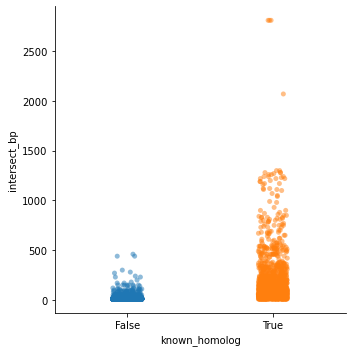

In [68]:
sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_bp', alpha=0.5)


In [69]:
mouse_gather_results.sort_values('intersect_bp', ascending=False)

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,moltype,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog
0,ENSMUSP00000158051.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Dnah8,DNAH8,ENSG00000124721,"Dyneins, axonemal outer arm complex subunits","Dyneins, axonemal outer arm complex subunits",True,Dnah8---DNAH8,True
0,ENSMUSP00000157469.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Dnah8,DNAH8,ENSG00000124721,"Dyneins, axonemal outer arm complex subunits","Dyneins, axonemal outer arm complex subunits",True,Dnah8---DNAH8,True
0,ENSMUSP00000127878.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Dnah8,DNAH8,ENSG00000124721,"Dyneins, axonemal outer arm complex subunits","Dyneins, axonemal outer arm complex subunits",True,Dnah8---DNAH8,True
0,ENSMUSP00000038150.9pep chromosome:GRCm39:17:2...,2070.0,0.802326,0.824701,0.802326,0.802326,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Itpr3,ITPR3,ENSG00000096433,"Inositol 1,4,5-triphosphate receptors|Protein ...","Inositol 1,4,5-triphosphate receptors|Protein ...",True,Itpr3---ITPR3,True
0,ENSMUSP00000122082.3pep chromosome:GRCm39:17:3...,1300.0,0.726257,0.730337,0.726257,0.726257,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Col11a2,COL11A2,ENSG00000204248,Collagens,Collagens,True,Col11a2---COL11A2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.006897,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Tmprss3,PTPRK,ENSG00000152894,Protein tyrosine phosphatases receptor type|Fi...,Type II transmembrane serine proteases|Scaveng...,False,Tmprss3---PTPRK,False
1,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.008547,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Tmprss3,LPA,ENSG00000198670,NaN,Type II transmembrane serine proteases|Scaveng...,<NA>,Tmprss3---LPA,False
0,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.014925,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Tmprss3,SLC44A4,ENSG00000204385,Solute carriers,Type II transmembrane serine proteases|Scaveng...,False,Tmprss3---SLC44A4,False
1,ENSMUSP00000024829.7pep chromosome:GRCm39:17:3...,10.0,0.013889,0.006024,0.013889,0.013889,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,hp,72,Abcg1,ABCC10,ENSG00000124574,ATP binding cassette subfamily C|MicroRNA prot...,ATP binding cassette subfamily G,False,Abcg1---ABCC10,False


In [70]:
mouse_gather_results['intersect_kmer'] = mouse_gather_results['intersect_bp']/10

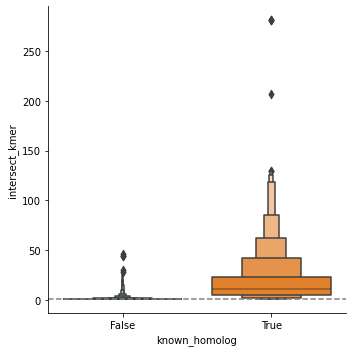

In [71]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', kind='boxen')
# g.set(yscale='log')
for ax in g.axes.flatten():
    ax.axhline(1, linestyle='--', color='grey')


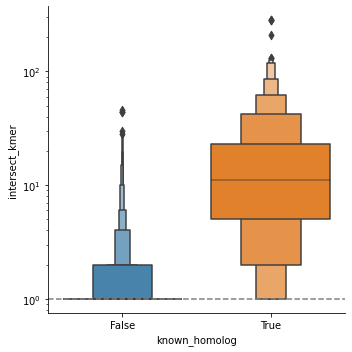

In [72]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', kind='boxen')
g.set(yscale='log')
for ax in g.axes.flatten():
    ax.axhline(1, linestyle='--', color='grey')


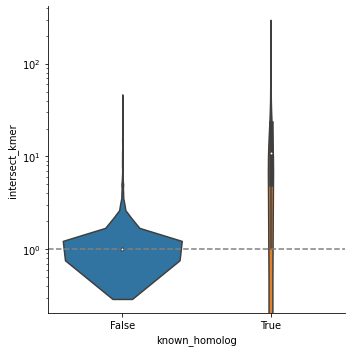

In [73]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', kind='violin')
g.set(yscale='log')
for ax in g.axes.flatten():
    ax.axhline(1, linestyle='--', color='grey')


### Broken boxplot of intersecting k-mers

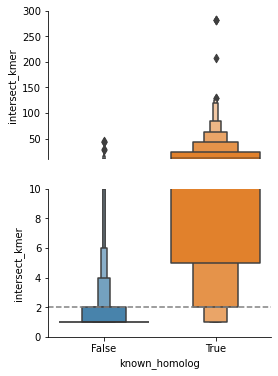

In [74]:
fig, axes = plt.subplots(nrows=2, figsize=(4,6))
for i, ax in enumerate(axes):
    sns.boxenplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', ax=ax)
    if i == 1:
        ax.axhline(2, linestyle='--', color='grey')
        ax.set(ylim=(0, 10))
        sns.despine(ax=ax)
    else:
        ax.set(ylim=(10, 300), xlabel=None, xticks=[])
        sns.despine(ax=ax, bottom=True)
fig.savefig('../figures/human_mouse_intersect_bp_known_homolog.pdf')

In [75]:
mouse_gather_results

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,ksize,mouse_gene_symbol,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog,intersect_kmer
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Casp16,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False,Casp16---PKHD1,False,1.0
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Casp16,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False,Casp16---RNGTT,False,1.0
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA,True,4.0
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,H2-Ea,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA,True,4.0
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,H2-Q5,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>,H2-Q5---HLA-A,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000057294.9pep chromosome:GRCm39:17:9...,10.0,0.008197,0.022222,0.008197,0.008197,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False,Nrxn1---PPIL4,False,1.0
0,ENSMUSP00000124561.3pep chromosome:GRCm39:17:9...,10.0,0.008333,0.022222,0.008333,0.008333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False,Nrxn1---PPIL4,False,1.0
0,ENSMUSP00000142650.2pep chromosome:GRCm39:17:9...,10.0,0.066667,0.022222,0.066667,0.066667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Nrxn1,PPIL4,ENSG00000131013,RNA binding motif containing|Cyclophilin pepti...,Neurexins|MicroRNA protein coding host genes,False,Nrxn1---PPIL4,False,1.0
0,ENSMUSP00000157180.2pep chromosome:GRCm39:17:9...,10.0,0.022727,0.003333,0.022727,0.022727,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,72,Mettl4,REV3L,ENSG00000009413,DNA polymerases,7BS N6-adenosine DNA/RNA methyltransferases,False,Mettl4---REV3L,False,1.0


/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


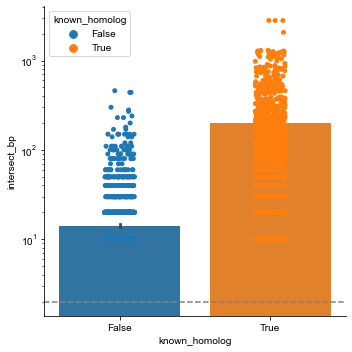

In [146]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_bp', kind='bar')
g.set(yscale='log')
for ax in g.axes.flat:
    sns.stripplot('known_homolog', 'intersect_bp', hue='known_homolog', ax=ax, data=mouse_gather_results)
    ax.axhline(2, linestyle='--', color='grey')
g.savefig('../figures/human_mouse_plot_for_legend.pdf')

In [83]:
mouse_gather_results['intersect_kmer_log2'] = np.log2(mouse_gather_results.intersect_kmer)

In [84]:
mouse_gather_results.same_gene_family.dtype

dtype('O')

In [85]:
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,human_gene_symbol,human_ensembl_id,human_gene_family,mouse_gene_family,same_gene_family,pair,known_homolog,intersect_kmer,same_gene_family_str,intersect_kmer_log2
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,PKHD1,ENSG00000170927,IPT domain containing,Caspases,False,Casp16---PKHD1,False,1.0,False,0.0
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,RNGTT,ENSG00000111880,Atypical dual specificity phosphatases,Caspases,False,Casp16---RNGTT,False,1.0,False,0.0
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA,True,4.0,True,2.0
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,HLA-DRA,ENSG00000204287,C1-set domain containing|Histocompatibility co...,C1-set domain containing|Histocompatibility co...,True,H2-Ea---HLA-DRA,True,4.0,True,2.0
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,HLA-A,ENSG00000206503,C1-set domain containing|Histocompatibility co...,NaN,<NA>,H2-Q5---HLA-A,False,1.0,<NA>,0.0


In [86]:
mouse_gather_results['same_gene_family_str'] = mouse_gather_results.same_gene_family.astype(str)

In [87]:
mouse_gather_results_have_gene_familes = mouse_gather_results.loc[mouse_gather_results.same_gene_family.notnull()]
mouse_gather_results_have_gene_familes.shape

(3256, 26)

In [104]:
# mouse_gather_results_have_gene_familes

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/7z/r1593ybs1sj2ks5zzl9vy8840000gn/T/ipykernel_55261/1187098004.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


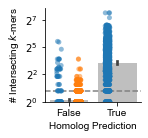

In [140]:
g = sns.catplot(
    data=mouse_gather_results_have_gene_familes,
    x="known_homolog",
    y="intersect_kmer_log2",
    kind="bar",
    alpha=0.5,
    color="grey",
    height=2,
)

# g.map(
#     sns.stripplot,
#     "known_homolog",
#     "intersect_kmer_log2",
#     "same_gene_family",
#     alpha=0.5,
#     dodge=True,
#     hue_order=[True, False],
# )
# g.legend()

# g.set(yscale='log')
for ax in g.axes.flat:
    sns.stripplot(
        "known_homolog",
        "intersect_kmer_log2",
        hue="same_gene_family",
        ax=ax,
        data=mouse_gather_results_have_gene_familes,
        alpha=0.5,
        dodge=True,
        hue_order=[True, False],
    )
    ax.axhline(np.log2(2), linestyle="--", color="grey")
    yticks = ax.get_yticks()
    yticklabels = [f"$2^{int(y)}$" for y in yticks]
    ax.set(
        yticklabels=yticklabels,
        ylabel="# Intersecting $k$-mers",
        xlabel="Homolog Prediction",
    )
    ax.get_legend().remove()

# g._legend('off')
g.savefig("../figures/human_mouse_intersect_bp_known_homolog_barplot.pdf")

# Compute metrics with scikit-learn

In [92]:
roc_auc_score = metrics.roc_auc_score(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_kmer"]
)
roc_auc_score

0.9374098096957276

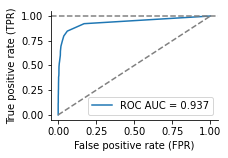

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_kmer"]
)
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score:.3f}")
ax.axhline(1, linestyle="--", color="grey")
sns.despine()
ax.plot([0, 1], [0, 1], linestyle="--", color="grey")
ax.set(xlabel="False positive rate (FPR)", ylabel="True positive rate (TPR)")
ax.legend()
fig.savefig("../figures/human_mouse_known_homolog_roc_auc.pdf")

In [130]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.13083316e-04, 2.13083316e-04,
       6.39249947e-04, 6.39249947e-04, 6.39249947e-04, 6.39249947e-04,
       6.39249947e-04, 6.39249947e-04, 6.39249947e-04, 6.39249947e-04,
      

In [131]:
tpr

array([0.        , 0.0022779 , 0.00303721, 0.00455581, 0.00683371,
       0.00759301, 0.00911162, 0.01138952, 0.01214882, 0.01442673,
       0.01518603, 0.01822323, 0.01898254, 0.02201974, 0.02733485,
       0.02885345, 0.03113136, 0.03264996, 0.03340926, 0.03644647,
       0.04100228, 0.04328018, 0.04479879, 0.04631739, 0.04859529,
       0.04935459, 0.0516325 , 0.0546697 , 0.05922551, 0.05998481,
       0.06150342, 0.06226272, 0.06529992, 0.06605923, 0.06833713,
       0.06909643, 0.07213364, 0.07593014, 0.08200456, 0.08504176,
       0.09263478, 0.09794989, 0.10098709, 0.103265  , 0.1070615 ,
       0.10933941, 0.11921033, 0.11996963, 0.12300683, 0.12756264,
       0.12832194, 0.13591496, 0.14350797, 0.14654518, 0.15110099,
       0.16324981, 0.17995444, 0.18906606, 0.19589977, 0.20045558,
       0.2088079 , 0.21867882, 0.22475323, 0.23234624, 0.24981017,
       0.26044039, 0.27486712, 0.28549734, 0.30220197, 0.3158694 ,
       0.33181473, 0.35914958, 0.38192863, 0.39787396, 0.42369

In [129]:
thresholds

array([282., 281., 207., 130., 128., 127., 126., 124., 123., 122., 120.,
       117., 116., 111.,  93.,  90.,  86.,  85.,  84.,  83.,  80.,  79.,
        77.,  76.,  75.,  74.,  73.,  69.,  67.,  66.,  65.,  64.,  61.,
        60.,  59.,  58.,  57.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,
        48.,  47.,  46.,  45.,  44.,  42.,  41.,  38.,  37.,  36.,  35.,
        34.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,  24.,  23.,
        22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,  12.,
        11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.])

## Classification results when min k = 2

In [138]:
print(
    metrics.classification_report(
        mouse_gather_results["known_homolog"],
        mouse_gather_results["intersect_kmer"] >= 2,
    )
)

              precision    recall  f1-score   support

       False       0.97      0.83      0.90      4693
        True       0.60      0.92      0.73      1317

    accuracy                           0.85      6010
   macro avg       0.79      0.88      0.81      6010
weighted avg       0.89      0.85      0.86      6010



In [97]:
mouse_gather_results.query('intersect_kmer_log2 >= 1 and known_homolog == False')[['pair', 'intersect_kmer', 'known_homolog']]

,pair,intersect_kmer,known_homolog
7,H2-T10---HLA-F,2.0,False
12,Olfr753-ps1---OR2H2,9.0,False
13,Olfr753-ps1---OR2B6,5.0,False
15,Olfr753-ps1---OR2H2,9.0,False
16,Olfr753-ps1---OR2B6,5.0,False
...,...,...,...
5975,Ston1---FOXC1,2.0,False
5978,Ston1---UTRN,2.0,False
5979,Ston1---FOXC1,2.0,False
5982,Ston1---UTRN,2.0,False


In [100]:
mouse_gather_results_families.query("intersect_kmer_log2 > 2 and known_homolog == False")[
    ["pair", "intersect_kmer", "known_homolog", 'Gene group name']
].drop_duplicates("pair")

,pair,intersect_kmer,known_homolog,Gene group name
12,Olfr753-ps1---OR2H2,9.0,False,"Olfactory receptors, family 2"
13,Olfr753-ps1---OR2B6,5.0,False,"Olfactory receptors, family 2"
103,Dynlt1a---DYNLT1,11.0,False,Dynein 2 complex subunits|Dynein 1 complex sub...
107,Dynlt1f---DYNLT1,11.0,False,Dynein 2 complex subunits|Dynein 1 complex sub...
121,Tagap1---CEP43,6.0,False,NaN
303,Slc22a2---SLC22A1,9.0,False,Solute carriers
304,Slc22a2---SLC22A3,5.0,False,Solute carriers
314,Slc22a1---SLC22A3,5.0,False,Solute carriers
322,Igf2r---COL11A2,5.0,False,Collagens
509,Dynlt2a1---DYNLT2,5.0,False,"Dyneins, axonemal outer arm complex subunits"


In [99]:
mouse_gather_results_families

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,...,Approved name,Status,Previous symbols,Alias symbols,Chromosome,Accession numbers,RefSeq IDs,Gene group ID,Gene group name,Mouse genome database ID(supplied by MGI)
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,PKHD1 ciliary IPT domain containing fibrocysti...,Approved,TIGM1,"ARPKD, FCYT, FPC",6p12.3-p12.2,AF480064,NM_138694,1752,IPT domain containing,MGI:2155808
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,RNA guanylyltransferase and 5'-phosphatase,Approved,NaN,"HCE, HCE1, hCAP",6q15,AF025654,NM_003800,896,Atypical dual specificity phosphatases,MGI:1329041
2,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class II, DR...",Approved,HLA-DRA1,NaN,6p21.32,NaN,NM_019111,591|588,C1-set domain containing|Histocompatibility co...,MGI:95900
3,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class II, DR...",Approved,HLA-DRA1,NaN,6p21.32,NaN,NM_019111,591|588,C1-set domain containing|Histocompatibility co...,MGI:95900
4,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"major histocompatibility complex, class I, A",Approved,NaN,NaN,6p22.1,D32129,NM_002116,591|588,C1-set domain containing|Histocompatibility co...,"MGI:95896, MGI:95904, MGI:95928, MGI:95929, MG..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,ENSMUSP00000057294.9pep chromosome:GRCm39:17:9...,10.0,0.008197,0.022222,0.008197,0.008197,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
6006,ENSMUSP00000124561.3pep chromosome:GRCm39:17:9...,10.0,0.008333,0.022222,0.008333,0.008333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
6007,ENSMUSP00000142650.2pep chromosome:GRCm39:17:9...,10.0,0.066667,0.022222,0.066667,0.066667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,peptidylprolyl isomerase like 4,Approved,NaN,NaN,6q25.1,NaN,NaN,725|909,RNA binding motif containing|Cyclophilin pepti...,MGI:1914668
6008,ENSMUSP00000157180.2pep chromosome:GRCm39:17:9...,10.0,0.022727,0.003333,0.022727,0.022727,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,...,"REV3 like, DNA directed polymerase zeta cataly...",Approved,NaN,"POLZ, REV3",6q21,AF058701,NM_002912,535,DNA polymerases,MGI:1337131


In [39]:
mouse_gather_results.shape

(6010, 20)

### Plot as histogram

In [40]:
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog,intersect_kmer
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,Casp16---PKHD1,False,1.0
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,Casp16---RNGTT,False,1.0
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA,True,4.0
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA,True,4.0
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,H2-Q5---HLA-A,False,1.0


In [41]:
mouse_gather_results = mouse_gather_results.reset_index(drop=True)

In [42]:
mouse_gather_results.shape

(6010, 20)

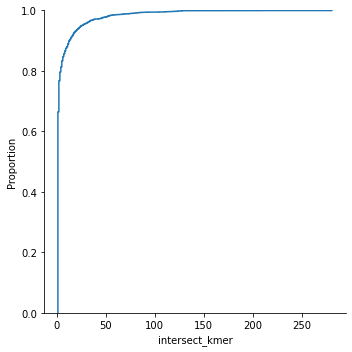

In [43]:
sns.displot(mouse_gather_results.intersect_kmer, kind='ecdf')

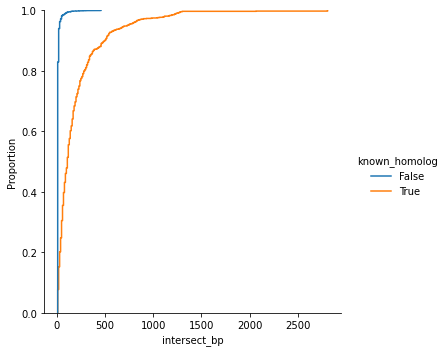

In [44]:
sns.displot(data=mouse_gather_results, hue='known_homolog', x='intersect_bp', kind='ecdf')

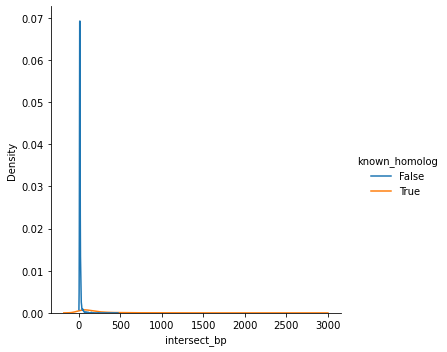

In [45]:
sns.displot(data=mouse_gather_results, hue='known_homolog', x='intersect_bp', kind='kde')

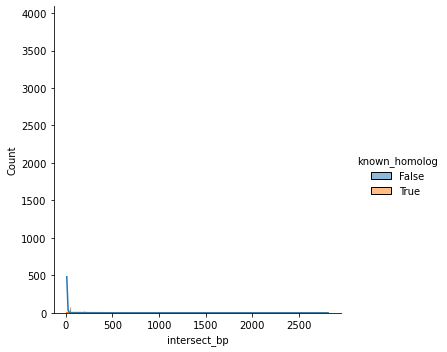

In [46]:
sns.displot(data=mouse_gather_results, hue='known_homolog', x='intersect_bp', kde=True)

# Compute significance of difference in distributions (Mann Whitney U test)

In [47]:
known_homolog_intersect_bp = mouse_gather_results.query('known_homolog == True').intersect_bp
unknown_homolog_intersect_bp = mouse_gather_results.query('known_homolog == False').intersect_bp
print(f'known_homolog_intersect_bp.shape, {known_homolog_intersect_bp.shape}')
print(f'unknown_homolog_intersect_bp.shape, {unknown_homolog_intersect_bp.shape}')

known_homolog_intersect_bp.shape, (1317,)
unknown_homolog_intersect_bp.shape, (4693,)


In [48]:
mannwhitneyu(known_homolog_intersect_bp, unknown_homolog_intersect_bp)

MannwhitneyuResult(statistic=5793831.0, pvalue=0.0)

In [49]:
mannwhitneyu(
    known_homolog_intersect_bp,
    unknown_homolog_intersect_bp,
    alternative="greater",
    # Don't do "exact", it makes the kernel die
    # method="exact",
)

MannwhitneyuResult(statistic=5793831.0, pvalue=0.0)

## Do related t-test

### nevermind! vectors aren't same length

In [50]:
ttest_rel(known_homolog_intersect_bp, unknown_homolog_intersect_bp)

ValueError: unequal length arrays

# Compute significance of overlap (chi-squared test)

In [ ]:
human_mouse_pairs_in_gather_results.shape

In [ ]:
mouse_gather_results.query('intersect_bp > 10').known_homolog.value_counts()

In [ ]:
mouse_gather_results

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support

In [ ]:
fpr, tpr, thresholds = roc_curve(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_bp"]
)

In [ ]:
auc_score = roc_auc_score(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_bp"]
)
auc_score

In [ ]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f"ROC curve (area = {auc_score:0.2f})",)
ax.plot([0, 1], [0, 1], "--", color="grey")
ax.legend()
plt.title("ROC of Sourmash Gather Homology detection")
ax.set(ylim=(0, 1), xlim=(0, 1), xlabel="False Positive Rate", ylabel="True Positive Rate")
sns.despine()

## Set threshold to `intersect_bp > 10` --> What's the precision recall?

In [ ]:
y_true = mouse_gather_results["known_homolog"]
y_pred = mouse_gather_results["intersect_bp"] > 10

precision, recall, fscore, support = precision_recall_fscore_support(
    y_true, y_pred, average="binary"
)
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"fscore: {fscore}")
print(f"support: {support}")